In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("C:\\Users\\dell\\Downloads\\data.csv\\data.csv", encoding="windows-1252")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [15]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
df=df.dropna(subset=["CustomerID","StockCode"])


In [18]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [19]:
df["Description"]=df["Description"].str.upper()

In [20]:
df = df[df['Quantity'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [21]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['TotalPrice']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPrice, Length: 397924, dtype: float64

In [22]:
Q1, Q3 = df['TotalPrice'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
df = df[(df['TotalPrice'] >= lower) & (df['TotalPrice'] <= upper)]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366683 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    366683 non-null  object        
 1   StockCode    366683 non-null  object        
 2   Description  366683 non-null  object        
 3   Quantity     366683 non-null  int64         
 4   InvoiceDate  366683 non-null  datetime64[ns]
 5   UnitPrice    366683 non-null  float64       
 6   CustomerID   366683 non-null  float64       
 7   Country      366683 non-null  object        
 8   TotalPrice   366683 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 28.0+ MB


In [24]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,366683.000000,366683,366683.000000,366683.000000,366683.000000
mean,7.856863,2011-07-11 17:46:19.337520640,2.745987,15320.331802,11.988928
min,1.000000,2010-12-01 08:26:00,0.000000,12347.000000,0.000000
25%,2.000000,2011-04-07 12:39:00,1.250000,13994.000000,4.200000
50%,4.000000,2011-08-01 14:06:00,1.690000,15220.000000,10.200000
75%,12.000000,2011-10-21 13:17:00,3.350000,16814.000000,17.340000
max,12540.000000,2011-12-09 12:50:00,40.460000,18287.000000,42.450000
std,23.111241,NaN,2.866916,1708.784209,9.103815


In [25]:
# top products by quantity brought
top_products=df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).nlargest(5)
top_products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    23263
PACK OF 72 RETROSPOT CAKE CASES      16653
ASSORTED COLOUR BIRD ORNAMENT        13619
ASSTD DESIGN 3D PAPER STICKERS       13522
JUMBO BAG RED RETROSPOT              12100
Name: Quantity, dtype: int64

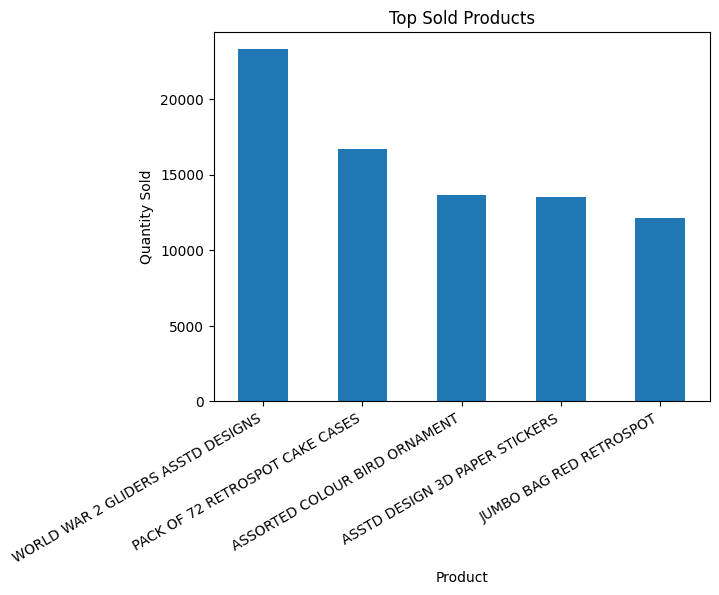

In [26]:
top_products.plot(kind="bar",title="Top Sold Products",xlabel="Product",ylabel="Quantity Sold")
plt.xticks(rotation=30,ha="right")

plt.show()

In [27]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalPrice            float64
dtype: object

In [28]:
df["Month"]=df["InvoiceDate"].dt.to_period("M")

In [29]:
# monthly revenue trend
monthly_rev=df.groupby("Month")["TotalPrice"].sum()
monthly_rev

Month
2010-12    280508.510
2011-01    239759.360
2011-02    227254.370
2011-03    301164.460
2011-04    259131.961
2011-05    338112.100
2011-06    306961.520
2011-07    295740.091
2011-08    318791.900
2011-09    475042.112
2011-10    538955.840
2011-11    641445.050
2011-12    173268.960
Freq: M, Name: TotalPrice, dtype: float64

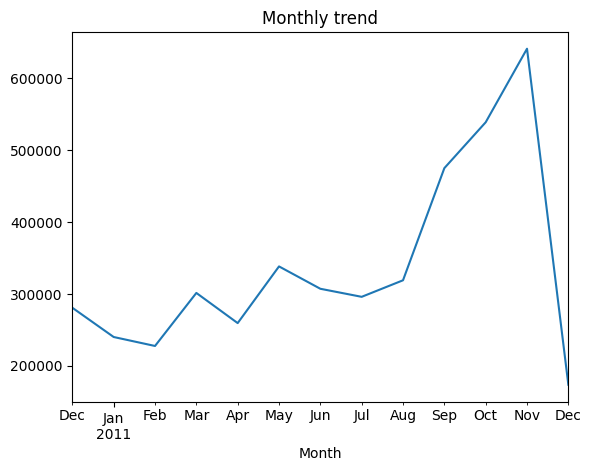

In [30]:
monthly_rev.plot(kind="line",title="Monthly trend")
plt.show()

In [33]:
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Poland', 'Portugal', 'Italy',
       'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Channel Islands',
       'Denmark', 'Spain', 'Cyprus', 'Finland', 'Austria', 'Sweden',
       'Greece', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Israel',
       'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified',
       'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA'],
      dtype=object)

In [36]:
# revenue by country
country_rev=df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).nlargest(5)
country_rev

Country
United Kingdom    3773730.244
Germany            139765.520
France             126993.560
EIRE               106134.210
Spain               33359.940
Name: TotalPrice, dtype: float64

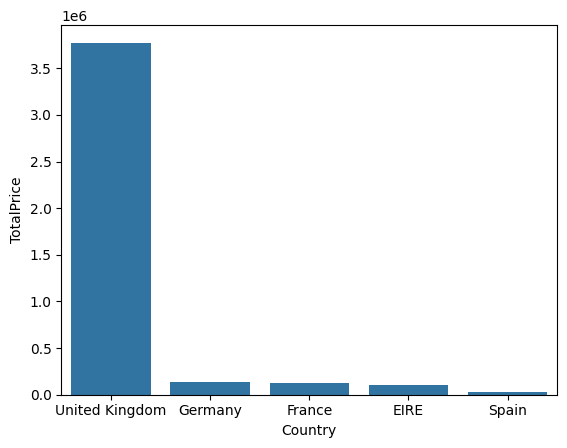

In [39]:
sns.barplot(country_rev)
plt.show()